<a href="https://colab.research.google.com/github/dmarinere/Team_Egypt_Corona/blob/master/Covid19_in_Egypt_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The task is to quantify the statistical significance of a public health policy introduced by African governments to slow down the spread of COVID-19.
In this Analysis, the goal is to understand the impact of Government interventions and forecasting COVID-19 Cases in Egypt. This task will aim to extend the paper ['Change name later']('https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-differential-equation-model') to our target country **EGYPT**

##  **Table of Content**
---
1. Installing and importing important library

2. Data Retrieval

3. Data Preprocessing and Basic Analysis


# Importing Libraries 

#### Install the latest version of **PYMC3** and also the **COVID-19** Library. They are essential for this analysis

In [ ]:
!pip install git+https://github.com/Priesemann-Group/covid19_inference.git
!pip install git+https://github.com/pymc-devs/pymc3

  Cloning https://github.com/Priesemann-Group/covid19_inference.git to /tmp/pip-req-build-hahg_y96
  Running command git clone -q https://github.com/Priesemann-Group/covid19_inference.git /tmp/pip-req-build-hahg_y96
  Created wheel for covid19-inference: filename=covid19_inference-0.1.8a0-cp36-none-any.whl size=103637 sha256=6759ad581f6d6b2cbb30817e4cd35e5240b9479ded7d4c379bc3140f468251cc
  Stored in directory: /tmp/pip-ephem-wheel-cache-bp1daxcw/wheels/da/f1/e7/da56ba4fe019b70927b4bb10088f02f672b31b69fd54a6e613
Successfully built covid19-inference
  Cloning https://github.com/pymc-devs/pymc3 to /tmp/pip-req-build-g0dek69q
  Running command git clone -q https://github.com/pymc-devs/pymc3 /tmp/pip-req-build-g0dek69q
  Created wheel for pymc3: filename=pymc3-3.9.3-cp36-none-any.whl size=75575241 sha256=4d063734ecd9f44f8ac5ea27b6825ef9b2fbbbf155455e65c52681dea00da409
  Stored in directory: /tmp/pip-ephem-wheel-cache-ve19h2yw/wheels/a1/e3/71/a696f2af0dd40bccc0ce672d616d21cc9dd90dbdd3f03242

Import the newly downloaded libraries and other important libraries


In [ ]:
import datetime
import time as time_module
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats
import theano
import theano.tensor as tt
import pymc3 as pm
import arviz as az
import covid19_inference as cov19
import pickle 
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')


# 2. Data retrieval

The next thing we want to do is load a dataset from reliable data sources.
There are multiple authentic data sources which can be found [here](https://covid19-inference.readthedocs.io/en/latest/doc/data_retrieval.html).
In this example we will use the JHU dataset, which comes from the John Hopkins University, we would use the COVID19 library for this. 


In [ ]:
jhu = cov19.data_retrieval.JHU()  # It is important to download the dataset!
jhu.download_all_available_data()

INFO     [covid19_inference.data_retrieval._JHU] Successfully loaded data from local


One could also parse True to the constructor of the class above to force an auto download so we could retrieve data as they are upload from our source

# 3. Data Preprocessing and Basic Analysis




For this task, the target country is **EGYPT**. Data to aid the analysis will be downloaded from John Hopkins University using the data retrieval method of the covid_19_inference library


you can learn more about the different filter methods [here](https://covid19-inference.readthedocs.io/en/latest/doc/data_retrieval.html#covid19_inference.data_retrieval.JHU.get_new).



The data was filtered by date. The starting date set is **14 February 2020** which corresponds to the date our target country recorded the first corona virus case.

In [ ]:
bd = datetime.datetime(2020, 2, 14)  # For the date filter from first confirmed case
ed = datetime.datetime.now() #Till now

Retrieve the Total(Cumulative) number of confirmed cases and also the number of new cases per day.

In [ ]:
total_cases_obs = jhu.get_total(
    value="confirmed", country = 'Egypt', data_begin=bd, data_end=ed
) #Obtain cummulative recorded cases
new_cases_obs = jhu.get_new(
    value="confirmed", country = 'Egypt', data_begin=bd, data_end=ed
) #Obtain daily recorded confirmed cases

In [ ]:
new_deaths = jhu.get_new(
    value="deaths", country = 'Egypt', data_begin=bd, data_end=ed).reset_index() #Obtain daily recorded death and turn to dataframe
new_recovered = jhu.get_new(
    value="recovered", country = 'Egypt', data_begin=bd, data_end=ed).reset_index() #Obtain daily recorvered cases and turn to dataframe

In [ ]:
new_cases = new_cases_obs.reset_index() #Turn to df

In [ ]:
#create new dataframe with daily recorded cases
new_df = pd.DataFrame({'date': new_cases.date, 'deaths':new_deaths.deaths, 'recovered':new_recovered.recovered, 'confirmed':new_cases.confirmed}) 

In [ ]:
total = jhu.get_total_confirmed_deaths_recovered( country = 'Egypt' ,begin_date=bd, end_date=ed)
total.reset_index(inplace = True) #Obtain cummulative cases and turn to df


In [ ]:
print("The Shape of total number of cases is", total_cases_obs.shape[0],
      "rows" )
print("The dimension of the total number of cases is",total_cases_obs.ndim)

The Shape of total number of cases is 176 rows
The dimension of the total number of cases is 1


In [ ]:
total.head() #Cummulative recorded cases

,date,confirmed,deaths,recovered
0,2020-02-14,1,0,0
1,2020-02-15,1,0,0
2,2020-02-16,1,0,0
3,2020-02-17,1,0,0
4,2020-02-18,1,0,0


In [ ]:
new_df.head() #daily recorded cases

,date,deaths,recovered,confirmed
0,2020-02-14,0,0,1
1,2020-02-15,0,0,0
2,2020-02-16,0,0,0
3,2020-02-17,0,0,0
4,2020-02-18,0,0,0


In [ ]:
total['dow'] = total.date.apply(lambda x: x.day_name()) #get day of the week from the date
new_df['dow'] =  new_df.date.apply(lambda x: x.day_name())

Days no new cases were recorded.

In [ ]:
nonew_cases= new_cases_obs[new_cases_obs == 0]

In [ ]:
nonew_cases

date
2020-02-15    0
2020-02-16    0
2020-02-17    0
2020-02-18    0
2020-02-19    0
2020-02-20    0
2020-02-21    0
2020-02-22    0
2020-02-23    0
2020-02-24    0
2020-02-25    0
2020-02-26    0
2020-02-27    0
2020-02-28    0
2020-02-29    0
2020-03-02    0
2020-03-03    0
2020-03-04    0
2020-03-07    0
2020-03-18    0
Name: confirmed, dtype: int64

>> **Some Plots**

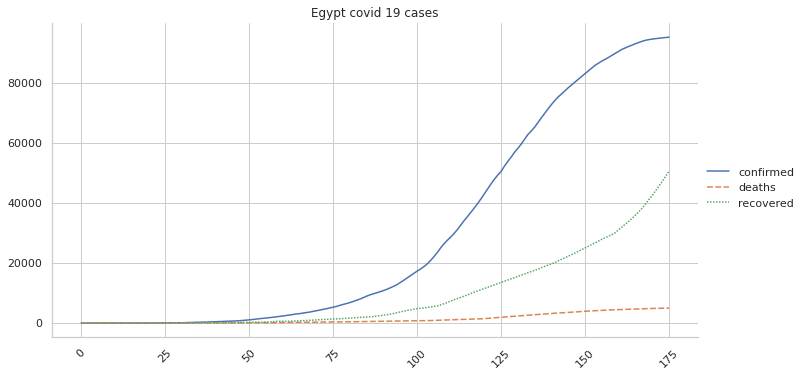

In [ ]:
sns.set_style("ticks", {"xtick.major": 10})
with sns.axes_style("whitegrid"):
  chart = sns.relplot( data = total.drop(['date', 'dow'], axis = 1),
                      kind = "line",aspect=2 );
chart.set_xticklabels(rotation=45);

plt.title("Egypt covid 19 cases");

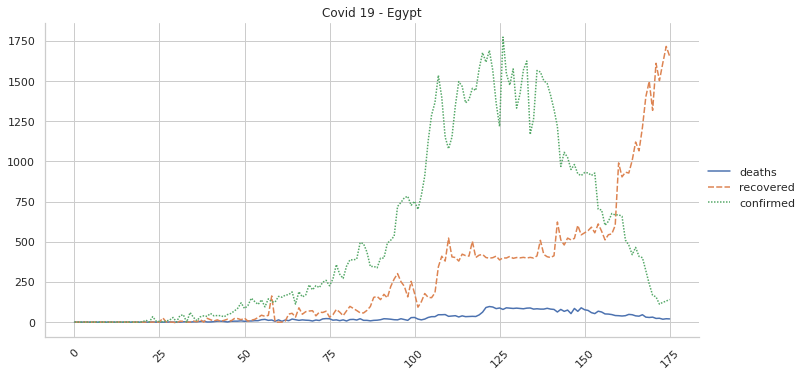

In [ ]:
sns.set_style("ticks", {"xtick.major": 10})
with sns.axes_style("whitegrid"):
  chart = sns.relplot( data = new_df.drop(['date', 'dow'], axis = 1),
                      kind = "line",aspect=2 );
chart.set_xticklabels(rotation=45);

plt.title("Covid 19 - Egypt");

>> Taking a Deeper Dive (Confirmed cases)

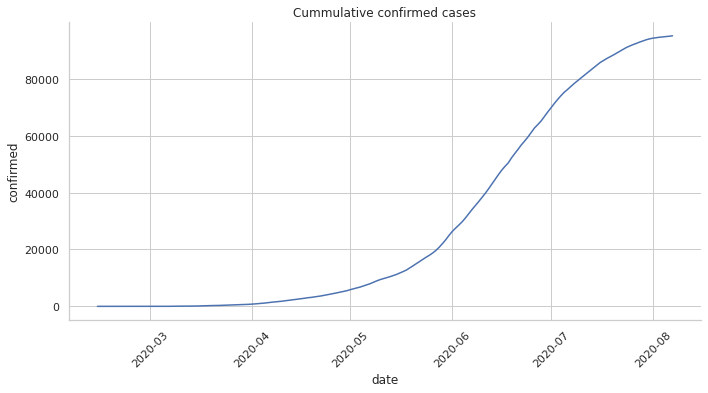

In [ ]:
sns.set_style("ticks", {"xtick.major": 10})
with sns.axes_style("whitegrid"):
  chart = sns.relplot("date", "confirmed", data = total,
                      kind = "line",aspect=2 );
chart.set_xticklabels(rotation=45);

plt.title("Cummulative confirmed cases");

We notice that there is a an increase in cases and noticed a decline around july which is extending to the month of august

INFO     [matplotlib.category] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO     [matplotlib.category] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


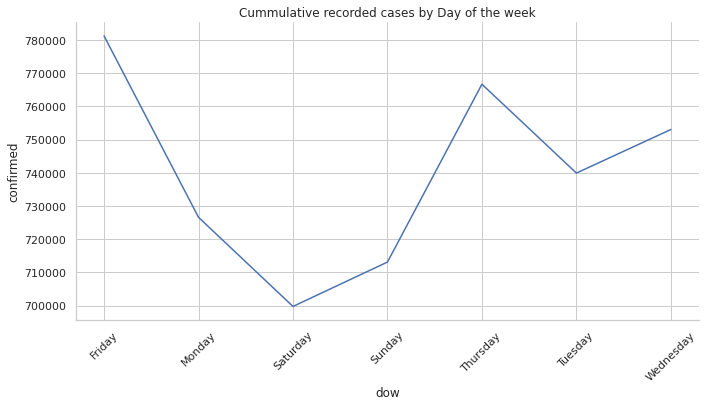

In [ ]:
v = total.groupby('dow')['confirmed','recovered'].sum().reset_index()
sns.set_style("ticks", {"xtick.major": 10})
with sns.axes_style("whitegrid"):
  chart = sns.relplot("dow", "confirmed", data = v,
                      kind = "line",aspect=2 );
chart.set_xticklabels(rotation=45);

plt.title("Cummulative recorded cases by Day of the week");

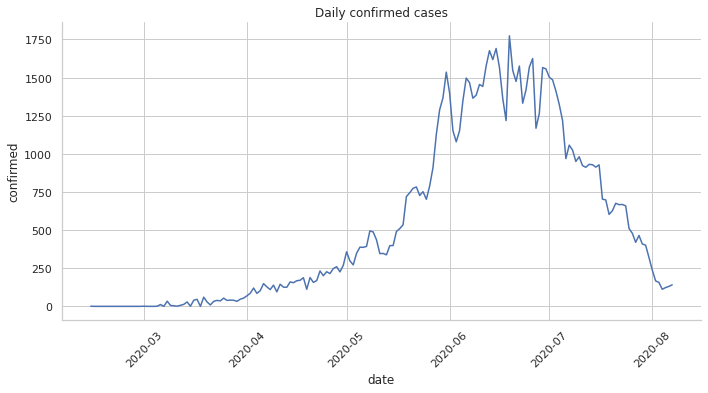

In [ ]:
sns.set_style("ticks", {"xtick.major": 10})
with sns.axes_style("whitegrid"):
  chart = sns.relplot("date", "confirmed", data = new_df,
                      kind = "line",aspect=2 );
chart.set_xticklabels(rotation=45);

plt.title("Daily confirmed cases");

The increases and the decline can be easily spotted with the Daily recorded number of cases plot. Also the continuous decline that started in july

INFO     [matplotlib.category] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO     [matplotlib.category] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


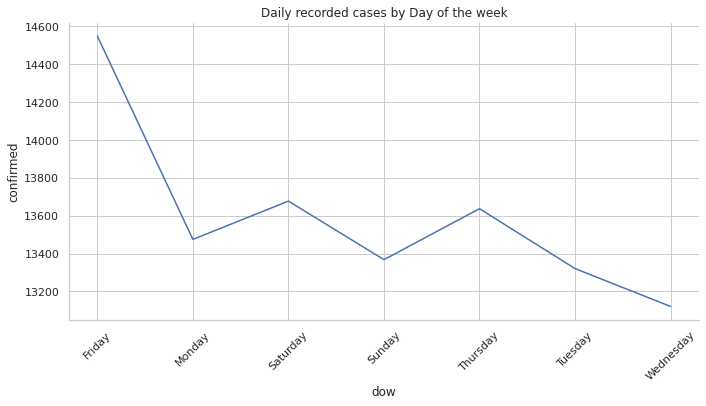

In [ ]:
v = new_df.groupby('dow')['confirmed','recovered'].sum().reset_index()
sns.set_style("ticks", {"xtick.major": 10})
with sns.axes_style("whitegrid"):
  chart = sns.relplot("dow", "confirmed", data = v,
                      kind = "line",aspect=2 );
chart.set_xticklabels(rotation=45);

plt.title("Daily recorded cases by Day of the week");

There's a spike in the daily number of cases recorded on Fridays which may be that cases over the week are compiled for reporting on Friday

>> Taking a Deeper Dive (Recovered cases)

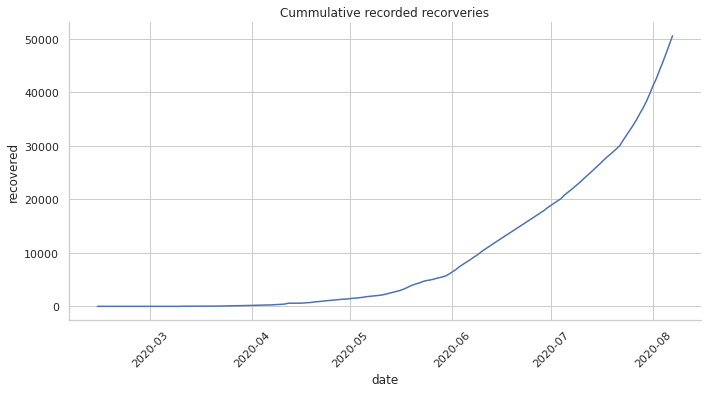

In [ ]:
sns.set_style("ticks", {"xtick.major": 10})
with sns.axes_style("whitegrid"):
  chart = sns.relplot("date", "recovered", data = total,
                      kind = "line",aspect=2 );
chart.set_xticklabels(rotation=45);

plt.title("Cummulative recorded recorveries");

The rate of recoveries is monotonically increasing

INFO     [matplotlib.category] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO     [matplotlib.category] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


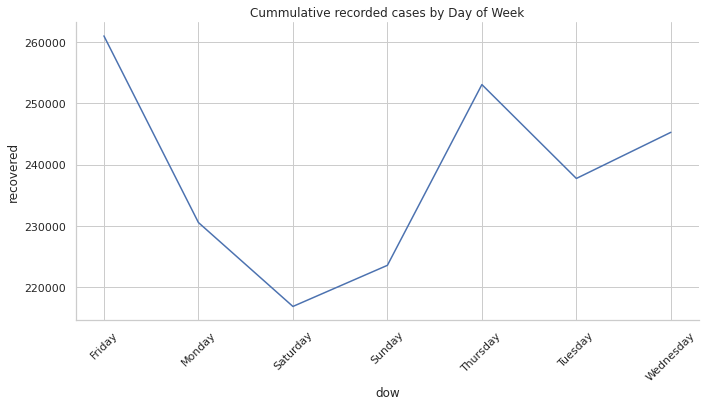

In [ ]:
v = total.groupby('dow')['confirmed','recovered'].sum().reset_index()
sns.set_style("ticks", {"xtick.major": 10})
with sns.axes_style("whitegrid"):
  chart = sns.relplot("dow", "recovered", data = v,
                      kind = "line",aspect=2 );
chart.set_xticklabels(rotation=45);

plt.title("Cummulative recorded cases by Day of Week");

The same spike on fridays can be spotted in the recoveries plot

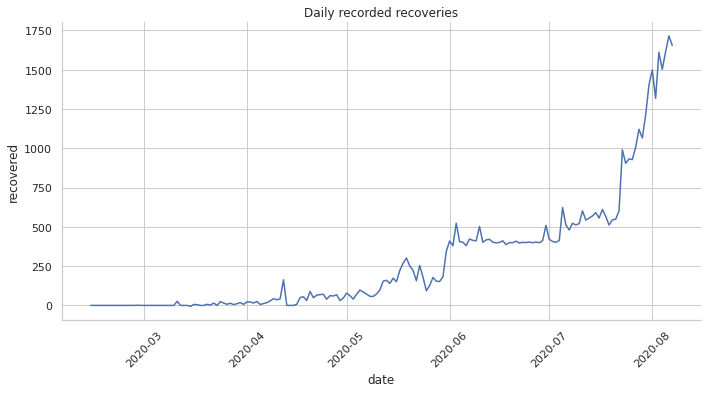

In [ ]:
sns.set_style("ticks", {"xtick.major": 10})
with sns.axes_style("whitegrid"):
  chart = sns.relplot("date", "recovered", data = new_df,
                      kind = "line",aspect=2 );
chart.set_xticklabels(rotation=45);

plt.title("Daily recorded recoveries");

INFO     [matplotlib.category] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO     [matplotlib.category] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


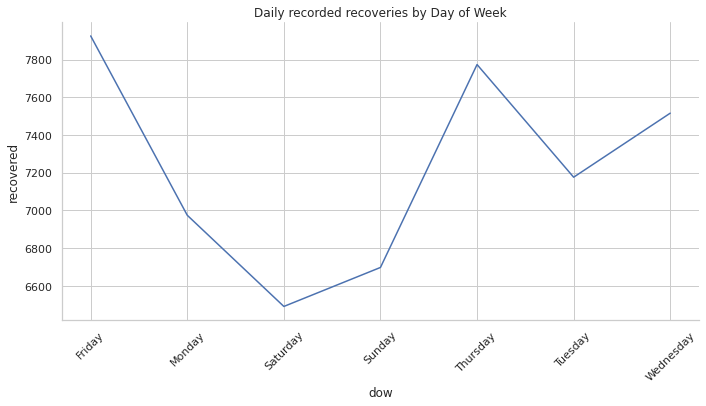

In [ ]:
v = new_df.groupby('dow')['confirmed','recovered'].sum().reset_index()
sns.set_style("ticks", {"xtick.major": 10})
with sns.axes_style("whitegrid"):
  chart = sns.relplot("dow", "recovered", data = v,
                      kind = "line",aspect=2 );
chart.set_xticklabels(rotation=45);

plt.title("Daily recorded recoveries by Day of Week");

>> Taking a Deeper Dive (Deaths)

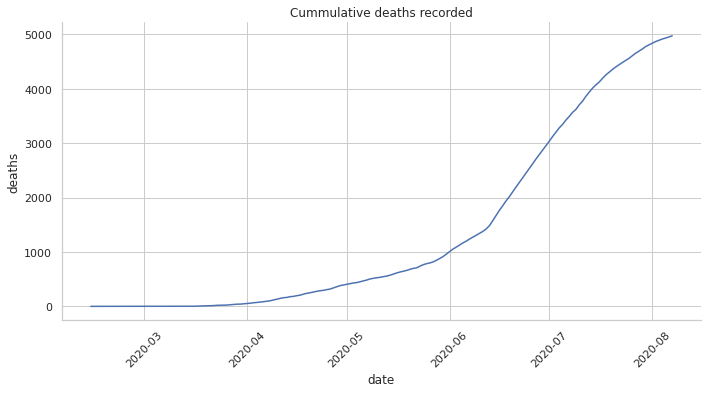

In [ ]:
sns.set_style("ticks", {"xtick.major": 10})
with sns.axes_style("whitegrid"):
  chart = sns.relplot("date", "deaths", data = total,
                      kind = "line",aspect=2 );
chart.set_xticklabels(rotation=45);

plt.title("Cummulative deaths recorded");

INFO     [matplotlib.category] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO     [matplotlib.category] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


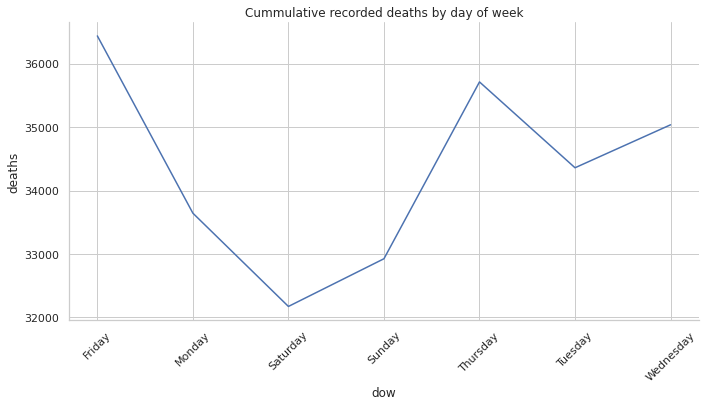

In [ ]:
v = total.groupby('dow')['deaths'].sum().reset_index()
sns.set_style("ticks", {"xtick.major": 10})
with sns.axes_style("whitegrid"):
  chart = sns.relplot("dow", "deaths", data = v,
                      kind = "line",aspect=2 );
chart.set_xticklabels(rotation=45);

plt.title("Cummulative recorded deaths by day of week");

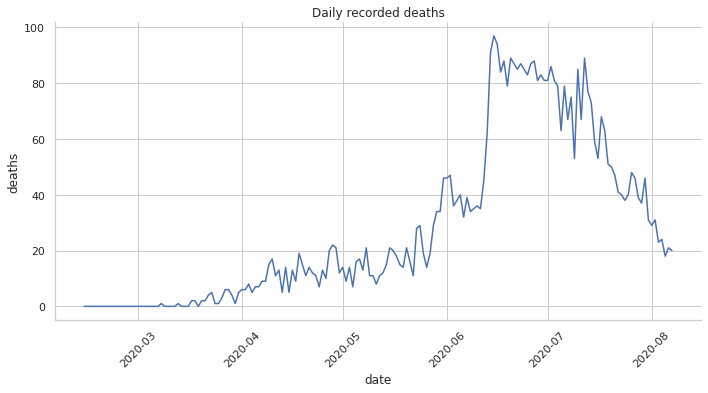

In [ ]:
sns.set_style("ticks", {"xtick.major": 10})
with sns.axes_style("whitegrid"):
  chart = sns.relplot("date", "deaths", data = new_df,
                      kind = "line",aspect=2 );
chart.set_xticklabels(rotation=45);

plt.title("Daily recorded deaths");

INFO     [matplotlib.category] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO     [matplotlib.category] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


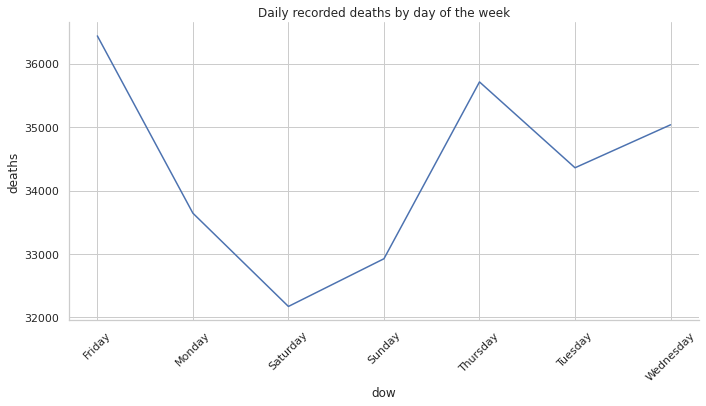

In [ ]:
v = total.groupby('dow')['deaths'].sum().reset_index()
sns.set_style("ticks", {"xtick.major": 10})
with sns.axes_style("whitegrid"):
  chart = sns.relplot("dow", "deaths", data = v,
                      kind = "line",aspect=2 );
chart.set_xticklabels(rotation=45);

plt.title("Daily recorded deaths by day of the week");

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

def decompose_time_series(series, frequency):
    """
    Decompose a time series and plot it in the console
    Arguments: 
        series: series. Time series that we want to decompose
    Outputs: 
        Decomposition plot in the console
    """
    result = seasonal_decompose(series, model='additive', freq = frequency )
    result.plot()
    plt.show()

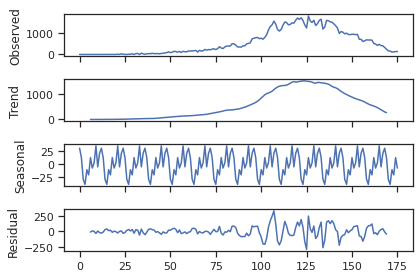

In [ ]:
decompose_time_series(new_df.confirmed, 12)

>> **Conclusion:** Egypt recorded had their first covid 19 case on the 14th of february. 1 month later (march 14th), the cases rose to 100 and went on to peak around mid june. While the number of death and confirmed cases have a noticeable peak, the number of recoveries is on a steady increase. Coronavirus in Egypt is on a decline as the number of recorveries recorded daily is more than the number of confirmed cases. There is also a noticeable spike on  Fridays which may be that cases are collated and reported/updated on Fridays